# P(Align) vs P(SDP Align) Experiments for +-Id

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from groupy import * 

# makes sure PSD up to some small TOL of - eval 
def check_SDP_alignment(X):
    TOL = 1e-6
    G = X.T@X
    A = np.diag(np.sum(G,axis=1)) - G
    # slower than Cholesky but doesnt complain when eigenvals are close to 0 
    evals, evecs = np.linalg.eig(A)
    e = np.min(evals)
    if e < -TOL:
        return False, e 
    return True, e

In [145]:
nvals = 20
# n trials per value
ntrials = 100

n = 100
d = 20

z = (np.ones(d).reshape(-1,1))/np.sqrt(d)

sigmas = np.linspace(0,1,nvals)
perc_sdp = np.zeros(nvals)
perc_align = np.zeros(nvals)

for i, s in enumerate(sigmas):
    nSDP = 0
    nAlign = 0
    
    for j in range(ntrials):
        X = np.random.normal(size = (d,n), loc = z, scale = s)
        nSDP += check_SDP_alignment(X)[0]
        nAlign += np.min((X.T@X) >= 0)
    perc_sdp[i] = nSDP/ntrials
    perc_align[i] = nAlign/ntrials

Text(0.5, 1.0, 'Probability of Gaussian Alignment vs SDP Alignment n=100, d=2')

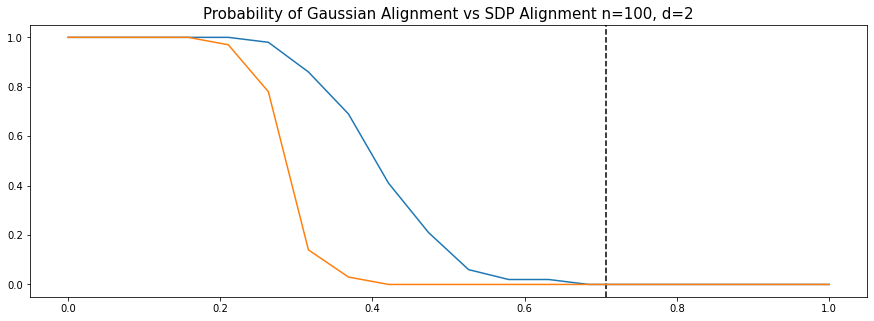

In [138]:
fig = plt.figure(figsize = (15,5))

plt.axvline(1/np.sqrt(d), color = 'black', ls = '--')
plt.plot(sigmas, perc_sdp, label = 'SDP Aligned')
plt.plot(sigmas, perc_align, label = 'Aligned')
plt.title(f"Probability of Gaussian Alignment vs SDP Alignment n={n}, d={d}", fontsize= 15)

Text(0.5, 1.0, 'Probability of Gaussian Alignment vs SDP Alignment n=100, d=20')

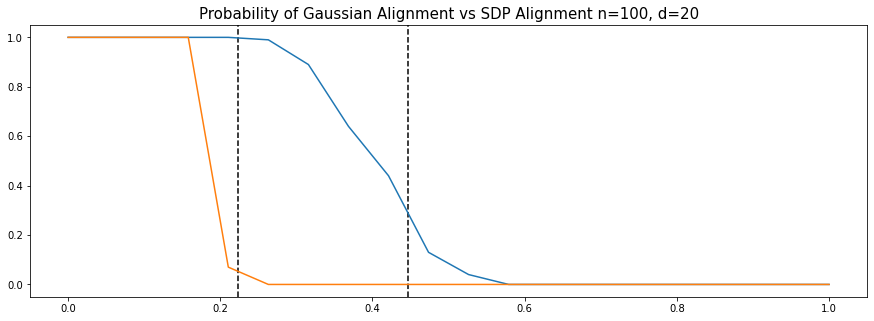

In [146]:
fig = plt.figure(figsize = (15,5))

plt.axvline(1/np.sqrt(d), color = 'black', ls = '--')
plt.axvline(2/np.sqrt(d), color = 'black', ls = '--')
plt.plot(sigmas, perc_sdp, label = 'SDP Aligned')
plt.plot(sigmas, perc_align, label = 'Aligned')
plt.title(f"Probability of Gaussian Alignment vs SDP Alignment n={n}, d={d}", fontsize= 15)

Text(0.5, 1.0, 'Probability of Gaussian Alignment vs SDP Alignment n=30, d=100')

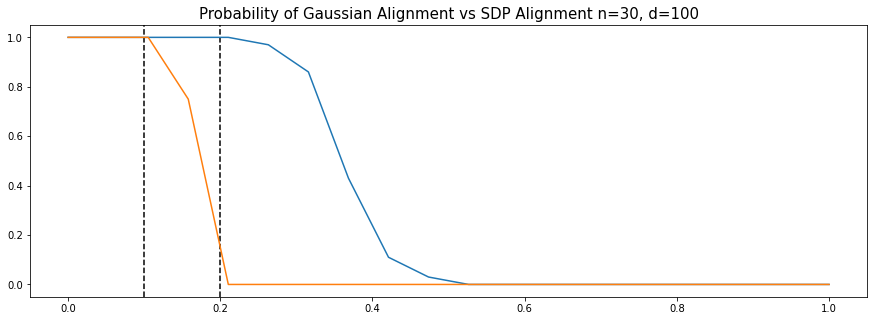

In [132]:
fig = plt.figure(figsize = (15,5))

plt.axvline(1/np.sqrt(d), color = 'black', ls = '--')
plt.axvline(2/np.sqrt(d), color = 'black', ls = '--')
plt.plot(sigmas, perc_sdp, label = 'SDP Aligned')
plt.plot(sigmas, perc_align, label = 'Aligned')
plt.title(f"Probability of Gaussian Alignment vs SDP Alignment n={n}, d={d}", fontsize= 15)

# In higher dim alignment has sharp cutoff between 1/sqrt(d) and 2/sqrt(d)

Text(0.5, 1.0, 'Probability of Gaussian Alignment vs SDP Alignment n=30, d=100')

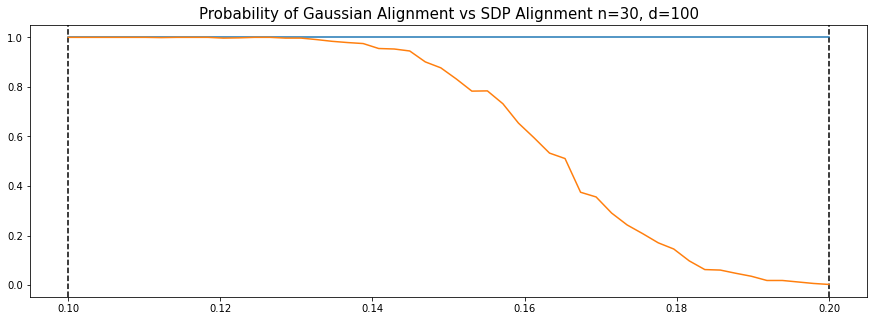

In [130]:
fig = plt.figure(figsize = (15,5))

plt.axvline(1/np.sqrt(d), color = 'black', ls = '--')
plt.axvline(2/np.sqrt(d), color = 'black', ls = '--')
plt.plot(sigmas, perc_sdp, label = 'SDP Aligned')
plt.plot(sigmas, perc_align, label = 'Aligned')
plt.title(f"Probability of Gaussian Alignment vs SDP Alignment n={n}, d={d}", fontsize= 15)